In [25]:
import pandas as pd
import numpy as np

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [30]:
from sklearn.preprocessing import LabelEncoder
new_pumpkins = pumpkins.apply(LabelEncoder().fit_transform)

In [32]:
new_pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,1,1,5,10,2,0,27,82,78,77,...,4,0,0,0,0,0,0,0,0,4
1,1,1,5,10,2,0,32,82,78,77,...,4,0,0,0,0,0,0,0,0,4
2,1,1,5,4,2,0,49,63,58,58,...,4,0,0,0,0,0,1,0,0,4
3,1,1,5,4,2,0,49,63,58,58,...,4,0,0,0,0,0,1,0,0,4
4,1,1,5,4,2,0,13,46,46,40,...,4,0,0,0,0,0,1,0,0,4


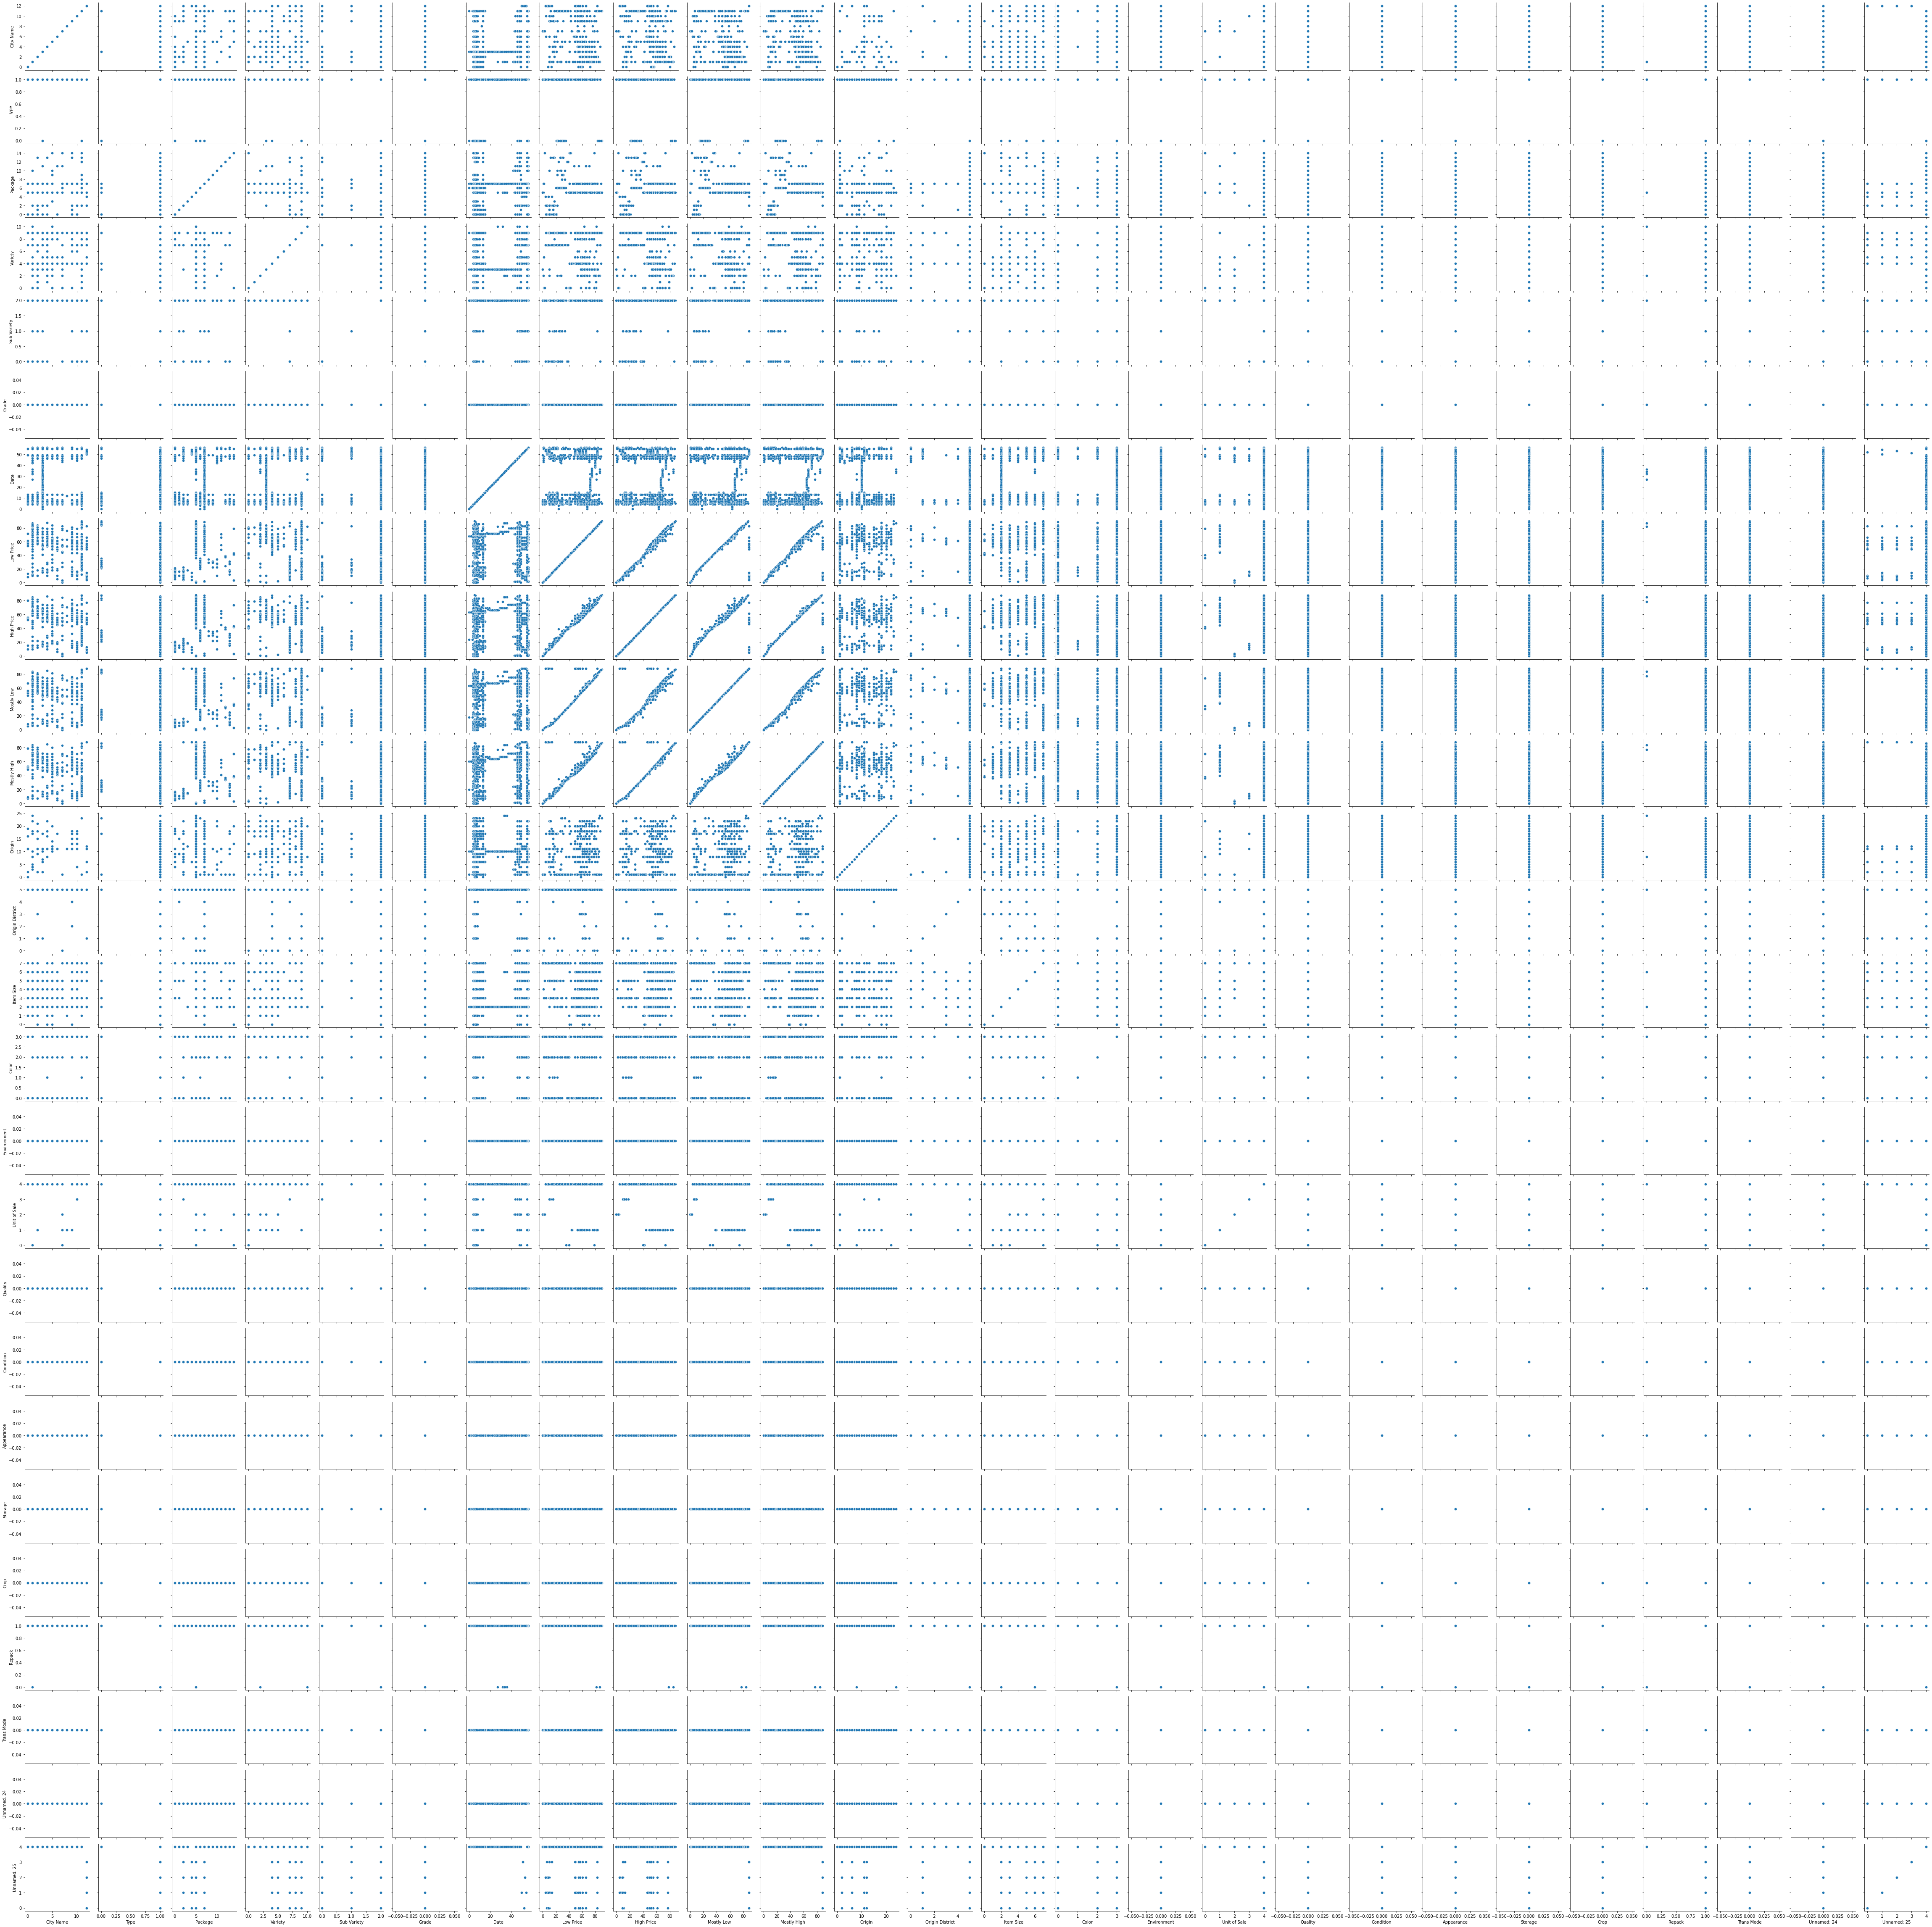

In [33]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

In [36]:
from sklearn.model_selection import train_test_split

Selected_features = [x for x in new_pumpkins.columns if x != 'Color']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.78      0.71       194
           1       0.00      0.00      0.00         2
           2       0.28      0.17      0.21        30
           3       0.56      0.44      0.49       126

    accuracy                           0.60       352
   macro avg       0.37      0.35      0.35       352
weighted avg       0.58      0.60      0.58       352

Predicted labels:  [0 3 0 0 0 0 3 3 0 3 2 0 3 2 0 0 0 0 0 2 0 0 0 3 0 0 3 0 0 3 3 0 0 0 0 0 0
 0 0 3 0 3 0 0 3 0 0 0 2 3 2 0 0 3 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 3
 0 0 3 0 0 3 3 0 0 0 0 3 3 3 2 0 0 3 3 0 3 0 3 0 2 0 0 0 3 0 3 0 0 0 0 3 0
 0 0 0 0 0 0 3 0 0 0 0 3 3 3 0 3 0 3 0 0 0 0 3 0 3 3 0 3 0 3 0 0 3 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 3 0 0 0 0 0 0 0 0 0 3 0 3 0 3 0 0 0 3 0
 0 3 0 0 0 3 0 2 2 0 0 0 0 0 0 0 0 3 3 0 0 0 0 3 3 0 0 3 0 3 3 0 3 2 3 0 0
 0 0 0 0 3 0 0 0 3 0 3 0 2 0 3 3 0 0 0 0 3 0 0 3 0 3 0 0 0 0 0 3 2 3 3 0 2
 0 0 0 0 0 0 0 3 0 0 

/home/ilya/anaconda3/envs/test-jupyter-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ilya/anaconda3/envs/test-jupyter-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ilya/anaconda3/envs/test-jupyter-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: Und

It appeared that Logistic Regression Model built for all features (not selected ones as in `notebook.ipynb`) has lower accuracy. I think this is because model start using features which does not affect color, and those features adds non excisting relations.